In [161]:
%reset
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
from sklearn.preprocessing import MinMaxScaler  
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense  
from tensorflow.keras.layers import LSTM  
from tensorflow.keras.layers import Dropout  
from tensorflow.keras.models import load_model

In [162]:
# apple_training_complete = pd.read_csv('AAPL.csv')
# # Convert to datetime for easier comparison
# apple_training_complete['Date']= pd.to_datetime(apple_training_complete['Date'])
# apple_testing_complete = pd.read_csv('AAPL_test.csv')  
# # Conver to datetime
# apple_testing_complete['Date']= pd.to_datetime(apple_testing_complete['Date'])

apple_train = pd.read_csv('AAPL_train.csv')
apple_val = pd.read_csv('AAPL_val.csv')

# Get the index for use later
apple_train_final_ind = len(apple_train) - 1
apple_val_final_ind = len(apple_val) - 1

# Append for use in generating training data
apple_complete = apple_train.append(apple_val)

apple_test = pd.read_csv('AAPL_test.csv')

In [163]:
apple_complete_processed = apple_complete.iloc[:, 1:2].values 

scaler = MinMaxScaler(feature_range = (0, 1))
apple_complete_scaled = scaler.fit_transform(apple_complete_processed)

n = 60
train_end = apple_train_final_ind - (n - 1)
val_end = apple_train_final_ind + apple_val_final_ind - (n - 1)

# train
features_set_train = []  
labels_train = []  

for i in range(n, train_end):  
    features_set_train.append(apple_complete_scaled[i-60:i, 0])
    labels_train.append(apple_complete_scaled[i, 0])

features_set_train, labels_train = np.array(features_set_train), np.array(labels_train) 
features_set_train = np.reshape(features_set_train, (features_set_train.shape[0], features_set_train.shape[1], 1)) 

# val
features_set_val = []  
labels_val = []  
for j in range(n + train_end, val_end):
    features_set_val.append(apple_complete_scaled[j-60:j, 0])
    labels_val.append(apple_complete_scaled[j, 0])

features_set_val, labels_val = np.array(features_set_val), np.array(labels_val) 
features_set_val = np.reshape(features_set_val, (features_set_val.shape[0], features_set_val.shape[1], 1))  

In [164]:
num_epochs = 100
model = Sequential()  
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set_train.shape[1], 1),unroll=False))  
model.add(Dropout(0.2))  
model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))
model.add(LSTM(units=50))  
model.add(Dropout(0.2))  
model.add(Dense(units = 1))  
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['acc'])  
history = model.fit(features_set_train, labels_train, validation_data=(features_set_val, labels_val), epochs = num_epochs, batch_size = 32)  

Epoch 1/100
79/79 [==============================] - 6s 70ms/step - loss: 0.0035 - acc: 0.0000e+00 - val_loss: 0.0064 - val_acc: 0.0000e+00
Epoch 2/100
79/79 [==============================] - 5s 57ms/step - loss: 6.4314e-04 - acc: 0.0000e+00 - val_loss: 0.0154 - val_acc: 0.0000e+00
Epoch 3/100
79/79 [==============================] - 4s 57ms/step - loss: 6.1974e-04 - acc: 0.0000e+00 - val_loss: 2.0789e-04 - val_acc: 0.0000e+00
Epoch 4/100
79/79 [==============================] - 4s 55ms/step - loss: 5.2611e-04 - acc: 0.0000e+00 - val_loss: 0.0032 - val_acc: 0.0000e+00
Epoch 5/100
79/79 [==============================] - 4s 55ms/step - loss: 4.7797e-04 - acc: 0.0000e+00 - val_loss: 5.7886e-04 - val_acc: 0.0000e+00
Epoch 6/100
79/79 [==============================] - 4s 56ms/step - loss: 4.4629e-04 - acc: 0.0000e+00 - val_loss: 5.4559e-04 - val_acc: 0.0000e+00
Epoch 7/100
79/79 [==============================] - 4s 56ms/step - loss: 4.0964e-04 - acc: 0.0000e+00 - val_loss: 0.0014 - val_

In [165]:
def plot_histories(histories):
    '''Helper function for plotting histories of models for comparison. Shows accuracy in first plot and loss in second.'''
    # Clear any previous plots
    plt.clf()
    # Split into subplots
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
    # Loop through history dat and plot
    for history in histories:
        data = history.get('data')
        color = history.get('color')
        name = history.get('name')

        acc = data.history['acc']
        val_acc = data.history['val_acc']
        loss = data.history['loss']
        val_loss = data.history['val_loss']
        epochs_range = range(len(acc))

        ax1.plot(epochs_range, acc, f'{color}o',label=f'Train Acc: {name}')
        ax1.plot(epochs_range, val_acc, color, label=f'Val Acc: {name}')
        ax1.set_title('Training and Validation Accuracy')

        ax2.plot(epochs_range, loss, f'{color}o', label=f'Train Loss: {name}')
        ax2.plot(epochs_range, val_loss, color, label=f'Val Loss: {name}')
        ax2.set_title('Training and Validation Loss')
    ax1.legend()
    ax2.legend()
    fig.tight_layout()

<Figure size 432x288 with 0 Axes>

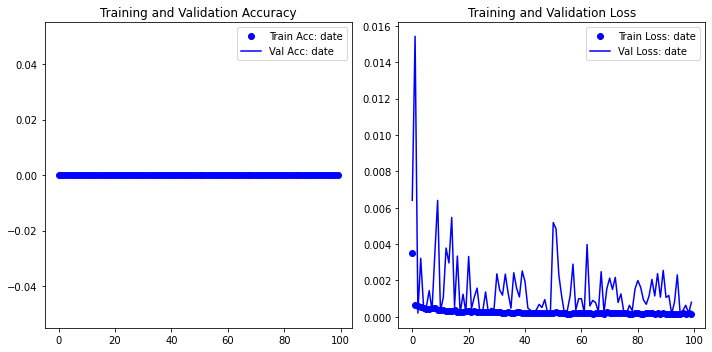

In [166]:
histories = [
    {
        'name': 'date',
        'data': history,
        'color': 'b'
    }
]
plot_histories(histories)

In [ ]:
# PROBLEM 2
# We would do this with a multioutput dense layer at the end, using a softmax classifier.